# **Taller Semana 1**

### ***Librerias***

In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
import matplotlib.pyplot as plt

## ***Etapa 1: Entender los Datos***

Para ejecutar cualquier modelo de machine Learning se debe comprender las caracteristicas del Data Set a usar para el modelo, esto es vital para evitar basura en los datos como puede ser datos nulos, datos de un tipo diferente a los demas de la columna y valores atipicos etc.

Ademas es vital conocer las medidad de tendencia central y las medidas de dispecion del Data Set con el fin de corregirlas en caso de exisitir o bien ignorarlas

In [74]:
data = load_iris()
data.keys()

# Se obtienen las llaves del diccionario para visualizar sus nombres y posteriormente extraer sus datos 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [75]:
data['target_names']
# Se observan los nombres de las flores iris para ser asignadas mas adelante a un DataFrame

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
data['target']
# Se observan los valores numeros  de las flores iris para ser asignadas mas adelante a un DataFrame

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
Data = pd.DataFrame(data['data'],columns=data['feature_names'])
# Se crea un Data Frame a partir del diccionario, para ello primero se obtienen los datos y a cada nueva columna de dato se le asigna el nombre de las feature_names

Data['Flower']=data['target']
# Al Data Frame Creado se le agrega un nueva columna que contendra el valor entero asignado a cada especia de flor

Data['Flower_name'] = ['setosa' if x==0  else 'versicolor' if x==1 else 'virginica' for x in Data['Flower']]
Data
# Al final se agrega una ultima columna la cual tiene el nombre de las flores para usando un condional el cual recorre la columna Flower y va asignando el nombre 
# correspondiente a los targets vistos antes


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


C:\Users\PC\AppData\Local\Temp\ipykernel_68716\273817518.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


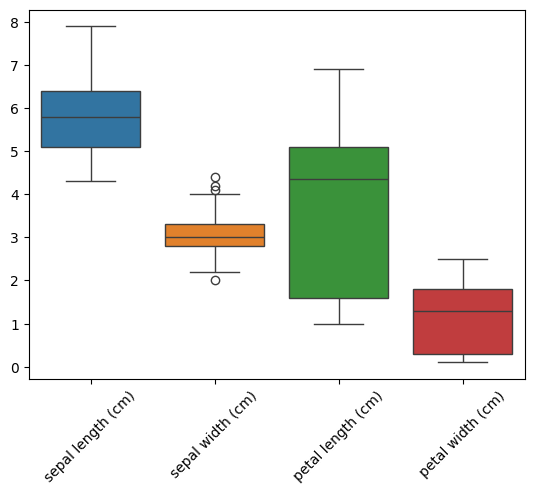

In [78]:
ax = sns.boxplot((Data['sepal length (cm)'],Data['sepal width (cm)'],
             Data['petal length (cm)'],Data['petal width (cm)']))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Con el Data Frame Creado se hace una pequeña exploracion de datos para saber que anomalias existen, para ello se usa un boxplot el cual me permite ver aquellos datos atipicos 
# que esten presentes en un data frame. En este caso el "Sepal_width" presenta unos cuantos datos atipicos

In [79]:
pd.DataFrame(data['data'],columns=data['feature_names']).isnull().sum()
# Posterior a ver los datos atipicos se procede a ver si existen datos nulos, en este caso no hay ningun dato nulo
# los datos del DataFrame y el diccionario original son los mismos por lo que se opta por usar el diccionario para esta parte

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [80]:
pd.DataFrame(data['data'],columns=data['feature_names']).dtypes
# Luego me interesa ver los tipo de datos con los que se trabajara en la parte de las caracteristicas y si dentro de estos no hay datos de otro tipo 
# los datos del DataFrame y el diccionario original son los mismos por lo que se opta por usar el diccionario para esta parte

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [81]:
pd.DataFrame(data['target'],columns=['Target']).dtypes
# Luego me interesa ver los tipo de datos con los que se trabajara en la parte de las etiquetas y si dentro de estos no hay datos de otro tipo 
# los datos del DataFrame y el diccionario original son los mismos por lo que se opta por usar el diccionario para esta parte

Target    int32
dtype: object

## ***Etapa 2: Preprocesar Datos***

En esta seccion se limpia la base de datos par tener consistencia entre los datos en este caso se optara por eliminar las filas correspondientes a los datos atipicos para sepal Width

In [82]:
limite_inferior = np.percentile(Data['sepal width (cm)'],25)
limite_superior = np.percentile(Data['sepal width (cm)'],75)
rango = limite_superior-limite_inferior
# Anteriormente se evidencion algunos datos atipicos, por lo que se procede a calcular un limite inferior y superior 
# asi como un rango para el posterior calculo de aquellos valores atipicos

In [83]:
Atipico_bajo = limite_inferior - (1.5*rango)
Atipico_alto = limite_superior + (1.5*rango)
# Se calculan los valores atipicos por el limite inferior y superior con la formula de los rangos intercuartiles

In [84]:
Data = Data.drop(Data[Data['sepal width (cm)']>Atipico_alto].index)
# Se eliminan aquellos datos que esten por encima de la variable Atipico_alto

In [85]:
Data = Data.drop(Data[Data['sepal width (cm)']<Atipico_bajo].index)
# Se eliminan aquellos datos que esten por debajo de la variable Atipico_bajo

In [86]:
Data.shape
# Se hace una comparacion para ver cuantos datos fueron eliminados, en este caso se eliminaron 4 datos atipicos

(146, 6)

C:\Users\PC\AppData\Local\Temp\ipykernel_68716\2569415871.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


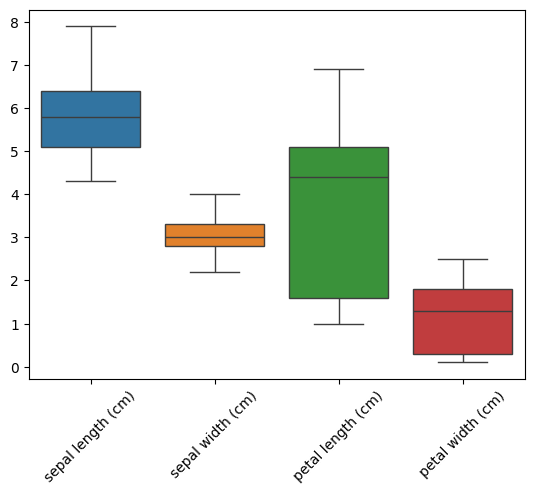

In [87]:
ax = sns.boxplot((Data['sepal length (cm)'],Data['sepal width (cm)'],
             Data['petal length (cm)'],Data['petal width (cm)']))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()
# Se vuelve a hacer un box plot para verificar que en efecto en nuevo data Set no tiene datos anormales

## ***Etapa 3: Modelado de los Datos***

Una vez se comprueba que los datos no tienen inconsistencias, no hay valores nulos, no hay datos atipicos. Para el caso del Data Set se eliminaron 4 datos atipicos correspondientes a ***"sepal width"***, dejando un data set con 146 datos. Luego se procede a crear el modelo con los datos ya depurados

In [88]:
Data.columns
# A partir del data set depurado me intersa tener el nombre de las columnas para no cometer errores de typo

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Flower', 'Flower_name'],
      dtype='object')

In [89]:
X = Data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = Data['Flower']
# Separo los datos de X & Y para su posterior analisis, en este caso al tratarse de un Data Frame se escriben los nombres de 
# las columnas que seran parte de los arrays provicionales

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se hace la particion de los datos dejando por convencion un 20% de los datos para test y el 80% para entreno

In [91]:
rango_vecinos = range(1,9)
# se crea una variable que me permitira cambiar facilmente el rango de vecinos par mayor facilidad 

Accuracy: 0.93333
Recall: 0.93333
Precision: 0.93333


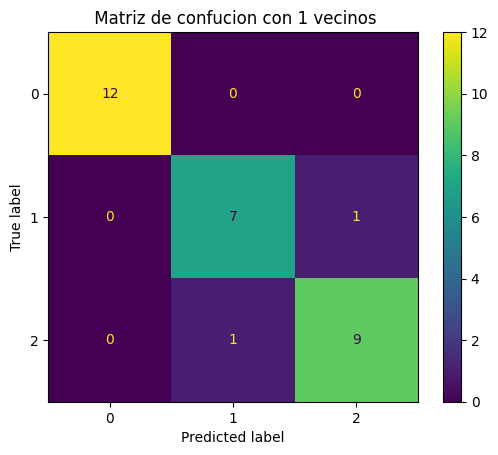

Accuracy: 0.93333
Recall: 0.93333
Precision: 0.93333


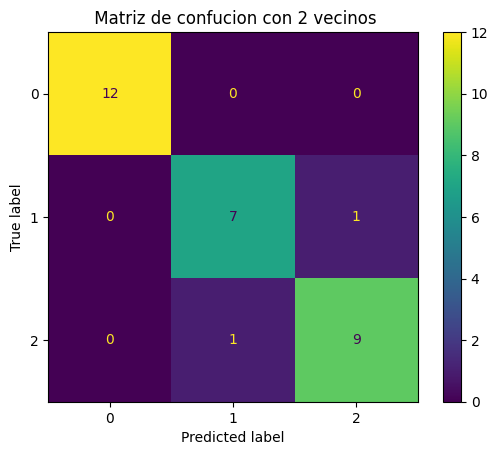

Accuracy: 0.93333
Recall: 0.93333
Precision: 0.93333


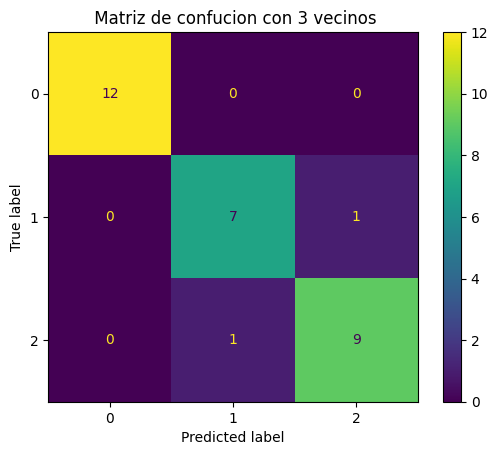

Accuracy: 0.93333
Recall: 0.93333
Precision: 0.93333


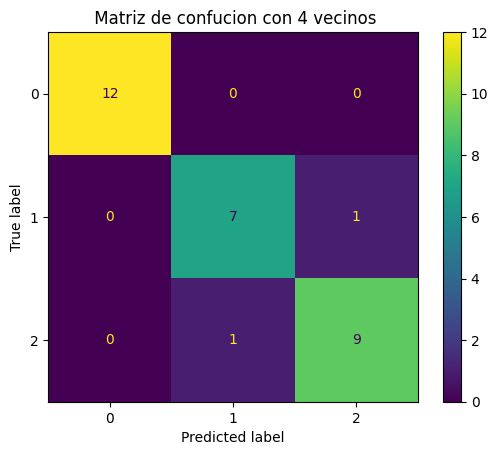

Accuracy: 0.96667
Recall: 0.96667
Precision: 0.96970


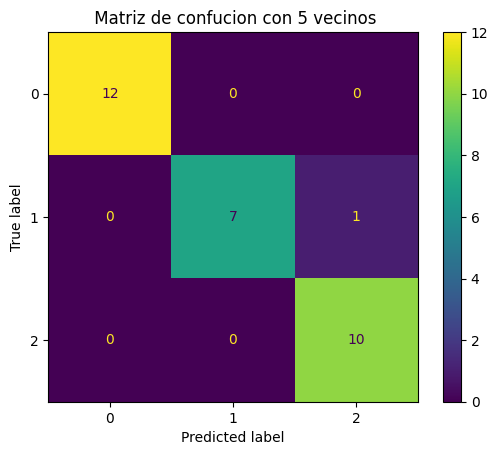

Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000


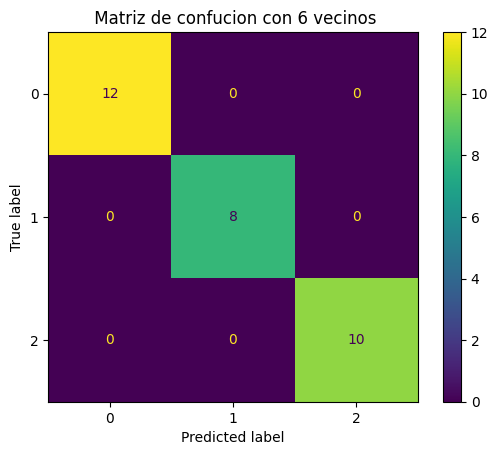

Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000


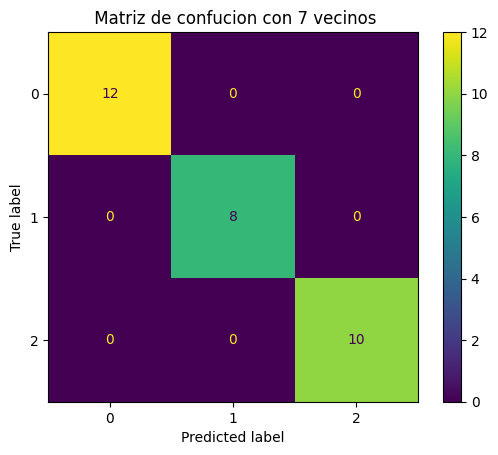

Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000


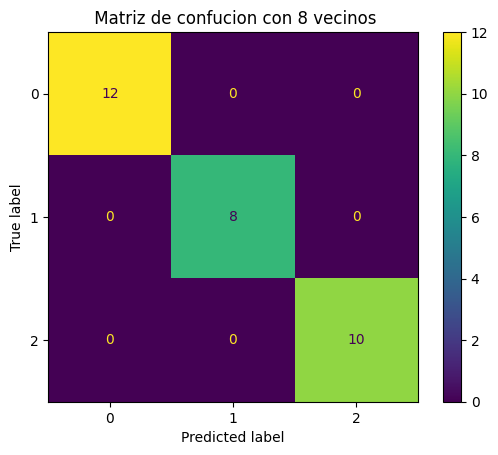

In [92]:
for i in rango_vecinos:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test,y_pred)
    print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
    print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
    
    disp = ConfusionMatrixDisplay(matriz)
    disp.plot()
    plt.title(f' Matriz de confucion con {i} vecinos')
    plt.show()
# Se crea un ciclo for el cual me permite ajustar un modelo con una cantidad de vecinos diferentes, tambien me permite ver su matriz
# de confusion y los pontajes de Accuracy, Recall y Precision en cada ejecucion para cada vecino

* El **accuracy_score** se encarga de calcular la precision de un modelo al predecir la etiqueta correcta a un dato y compararla con una etiqueta real de un data set de prueba.

* El **precision_score** es la relacion entre tp/(tp+fp), donde ***tp*** son los casos verdaderos positivos y ***fp*** son los casos falsos positivos, por lo que la precision lo que mide es la hablidad de un clasificador de NO etiquetar un caso positivo verdadero como falso, es decir el modelo alcanza un maximo de 1 el precision_score, por lo que se puede decir que con [5,6,7] vecinos en el 100% de las veces calsificara correctamente un caso verdadero positivo como verdadero positivo.

* El **recall_score** de manera muy similas al ***presicion_score***  el ***recall_score*** es una relacion entre los casos verdaderos positivos ***tp*** y los casos falsos positivos ***fp***, sin embargo en esta caso es la hablidad del clasificador para encontrar los casos positivos, por ejemplo al usar [1,2,3] vecinos se tiene un recall de 0.94, es decir de 100 "busquedas" el recall sera capaz de encontrar un caso positivo en el 94% de las veces. 

* La **Matriz de Confusion** muestra sobre su diagonal aquellos valores que el modelo predice correctamente es decir en la matriz con 8 vecino la cordenada [1,1] clasifico a 12 datos con 0 (setosa),en la cordenada [2,2] 8 con 1 (versicolor) y en la cordenada [3,3] 10 con 2 (virginica), siendo las filas el valor verdadero y las columnas el valor predicho, en caso de que aparezca un valor en [1,2] quiere decir que el dato corresponde a un label 0, pero el modelo lo clasifico como 1.

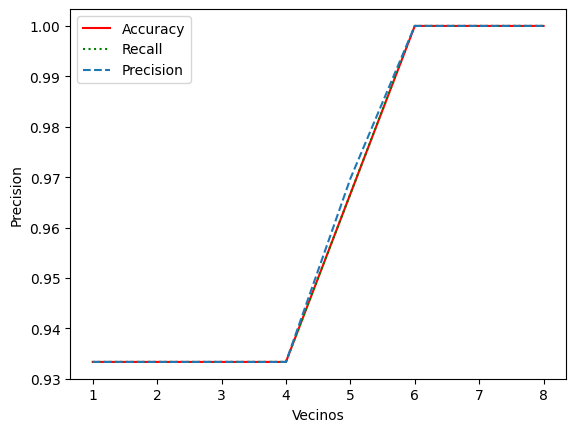

In [93]:
Y_axis = []
Y_axis_1 = []
Y_axis_2 = []
X_axis = []
for i in rango_vecinos:
    count = 0
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_accuracy = accuracy_score(y_test,y_pred)
    score_recall = recall_score(y_test,y_pred,average='weighted')
    score_precision = precision_score(y_test,y_pred,average='weighted')

    Y_axis.append(score_accuracy)
    Y_axis_1.append(score_accuracy)
    Y_axis_2.append(score_precision)
    X_axis.append(i)
    count += 1


plt.plot(X_axis,Y_axis,label='Accuracy', color='red')
plt.plot(X_axis,Y_axis_1,label='Recall', linestyle=':',color='green')
plt.plot(X_axis,Y_axis_2,label='Precision',linestyle='--')
plt.xlabel('Vecinos')
plt.ylabel('Precision')
plt.legend()
plt.show()

# El siguiente ciclo for se hace para guardar los valores de Accuracy, Recall y Precision en un listas para posteriormente graficarlas
# en cada ejecucion cada puntaje de las matricas a evaluar se van asignando en sus respectivas listas, una vez terminado el ciclo para el 
# rango de vecino asignado se procede a graficarlos, en este caso tiene que las matricas de Accuracy y recall son muy similares
# mientras que precison varia un poco al analizar 5 vecinos

In [94]:
rango_vecinos = range(10,30)
for i in rango_vecinos:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test,y_pred)
    print(f"Cantidad de veicnos: {i}")
    print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
    print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
    print("--"*64)


Cantidad de veicnos: 10
Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000
--------------------------------------------------------------------------------------------------------------------------------
Cantidad de veicnos: 11
Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000
--------------------------------------------------------------------------------------------------------------------------------
Cantidad de veicnos: 12
Accuracy: 0.96667
Recall: 0.96667
Precision: 0.97037
--------------------------------------------------------------------------------------------------------------------------------
Cantidad de veicnos: 13
Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000
--------------------------------------------------------------------------------------------------------------------------------
Cantidad de veicnos: 14
Accuracy: 0.93333
Recall: 0.93333
Precision: 0.94667
---------------------------------------------------------------------------------------------------

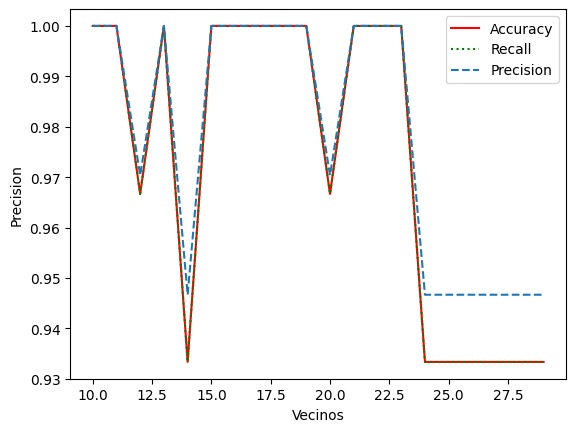

In [95]:
Y_axis = []
Y_axis_1 = []
Y_axis_2 = []
X_axis = []
for i in rango_vecinos:
    count = 0
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_accuracy = accuracy_score(y_test,y_pred)
    score_recall = recall_score(y_test,y_pred,average='weighted')
    score_precision = precision_score(y_test,y_pred,average='weighted')

    Y_axis.append(score_accuracy)
    Y_axis_1.append(score_accuracy)
    Y_axis_2.append(score_precision)
    X_axis.append(i)
    count += 1

plt.plot(X_axis,Y_axis,label='Accuracy', color='red')
plt.plot(X_axis,Y_axis_1,label='Recall', linestyle=':',color='green')
plt.plot(X_axis,Y_axis_2,label='Precision',linestyle='--')
plt.xlabel('Vecinos')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Se hace una ultima prueba para ver si existen mas rangos de vecinos que den un puntaje de 100%, en este caso [10, 12, 14, 15 a 19] muestran puntaje de 10, sin embargo, 
# estos vecinos se descartan pues a mayor cantidad de vecinos el modelo carece de complejidad lo que puede llevar a que el modelo no sea capaz de generalizar
# dando un Overfittig haciendo que nuevos datos no los pueda clasificar de manera correcta

## ***Etapa 4: Conclusiones***

Al observar el comprtamiento de las metricas la cantidad de vecinos para tener un modelo 100% exacto sin caer en el error de underfitting y que el modelo sea capaz de generalizar y predecir nuevos datos futuros es de 6, 7 u 8 vecinos. Sin embargo, el modelo de clasificacion funciona muy bien con un solo vecino dando metricas de 0.94, por lo que al usar este modelo se recomienda que el modelo se maneje con un vecino o dos, para que el modelo sea lo suficientemente complejo y robusto para poder generalizar la clasificacion y tambien pueda clasificar de manera correcta futuros datos.